In [179]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf

data_dir = Path('../data')

income_groups_1639 = pd.read_csv(data_dir / 'interim' / 'income_groups_1639.csv', index_col='district')
income_1880 = pd.read_csv(data_dir / 'interim' / 'income_tax_record_1880.csv', index_col=0)
income_1880['total_tax'] = income_1880.sum(axis=1)

C:\Users\antth\AppData\Local\Temp\ipykernel_9932\2929370045.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [180]:
totals = income_groups_1639.sum(axis=0)
percentiles = (totals / totals.sum()).round(2)
cum_percentiles = percentiles.cumsum()
cum_percentiles

no_tax    0.08
12_ore    0.73
16_ore    1.00
dtype: float64

In [181]:
breaks = income_1880.total_tax.quantile(cum_percentiles)
breaks

0.08      1.0
0.73      3.0
1.00    562.0
Name: total_tax, dtype: float64

In [182]:
classes = pd.cut(
    income_1880.total_tax,
    bins=[0] + list(breaks),
    labels=[1, 2, 3],
)
income_1880['class'] = classes
income_1880

,district,plot_number,estate_income,business_income,salary_pension_income,total_tax,class
0,Valli,1,0.0,0.0,3.0,3.0,2
1,Valli,2,15.0,0.0,25.0,40.0,3
2,Valli,2,0.0,0.0,1.0,1.0,1
3,Valli,2,0.0,0.0,1.0,1.0,1
4,Valli,2,0.0,0.0,40.0,40.0,3
...,...,...,...,...,...,...,...
3331,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3332,Sorvalinsaari,18,0.0,0.0,1.0,1.0,1
3333,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1
3334,Sorvalinsaari,19,0.0,0.0,1.0,1.0,1


In [183]:
cross = income_1880[["district", "class", "plot_number"]].groupby(["district", "class"]).count()
cross.rename(columns={'plot_number': 'count'}, inplace=True)
cross.to_csv(data_dir / 'processed' / 'classes_by_district_1880.csv')
cross

count
district             class       
Anina                1        155
                     2         27
                     3          5
Havi                 1         24
                     2          2
                     3          2
Hiekka               1         60
                     2         13
                     3         13
Huusniemi            1          0
                     2          1
                     3          0
Likolampi            1         31
                     2          4
                     3          1
Monrepos             1          5
                     2          0
                     3          0
P_Annan_kruunu       1         15
                     2          5
                     3          8
Pantsarlahti         1        338
                     2         57
                     3         18
Papula               1         39
                     2         10
                     3         16
Paulovski            1        158
                     2          8
                     3          0
Pietarin_esikaupunki 1        543
                     2        190
                     3        171
Pikiruukki           1         30
                     2          5
                     3          3
Repola               1         25
                     2         13
                     3         41
Salakkalahti         1         26
                     2         19
                     3         67
Saunalahti           1         25
                     2          9
                     3         12
Sorvalinsaari        1         82
                     2          8
                     3          0
Talikkala            1         14
                     2          0
                     3          1
Valli                1        279
                     2        191
                     3        290
Viipurin_esikaupunki 1        123
                     2         87
                     3         66

In [184]:
import cufflinks as cf

cross = cross.reset_index()
cross = cross.pivot(index='district', columns='class', values='count')
# cross = cross[['3', '2', '1']]
cross.columns

CategoricalIndex([1, 2, 3], categories=[1, 2, 3], ordered=True, dtype='category', name='class')

<AxesSubplot:ylabel='district'>

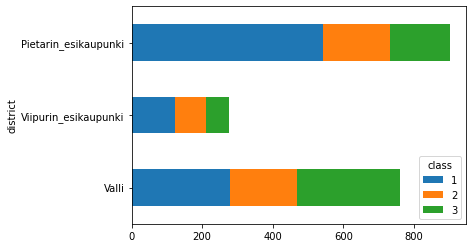

In [185]:
cross.loc['Valli Viipurin_esikaupunki Pietarin_esikaupunki'.split(' ')].plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

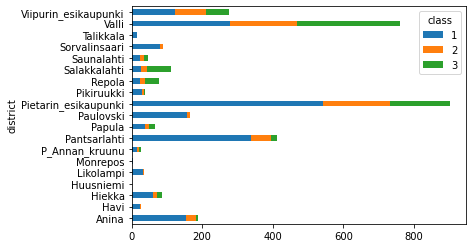

In [186]:
cross.plot(kind='barh', stacked=True)

<AxesSubplot:ylabel='district'>

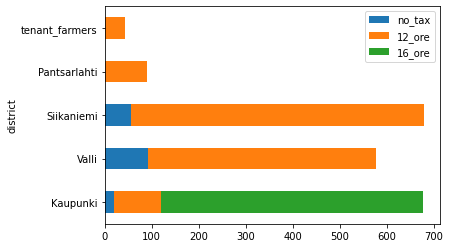

In [187]:
income_groups_1639.plot(kind='barh', stacked=True)